In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv

In [2]:

basename='HKLscan2_BPBO114';
folder='C:/SSRL/Jul2018/1_phi0';
imageindex=200;
strimageindex = '%(#)04i' % \
{"#": imageindex}
filenameraw=folder+'/Pilatus/b_mehta_'+basename+'_scan1_'+strimageindex+'.raw'

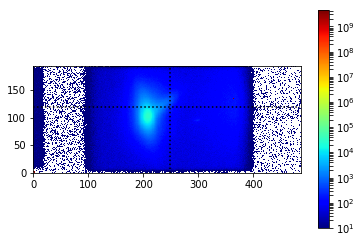

In [3]:
#OpenPilatusImage .raw
f1 = open(filenameraw, "r")
raw = np.fromfile(f1, dtype=np.uint32)
img=raw.reshape(195,487)
f1.close()
img[0,0] = 0;img[194,0] = 0;img[0,486] = 0;img[194,486] = 0;
#imgplot = plt.imshow(np.log10(img), cmap="jet",origin='lower');

imgplot = plt.imshow(img, cmap="jet",origin='lower',norm=colors.LogNorm(10,img.max()));
plt.colorbar();
db=[248,119];

plt.plot(db[0]*np.ones(194),np.arange(0,194),'k:')
plt.plot(np.arange(0,486),db[1]*np.ones(486),'k:')

In [64]:
#from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
def f(imageindex):

    basename='HKLscan2_BPBO114'
    folder='C:/SSRL/Jul2018/1_phi0';
    strimageindex = '%(#)04i' % \
    {"#": imageindex}
    filenameraw=folder+'/Pilatus/b_mehta_'+basename+'_scan1_'+strimageindex+'.raw'
    display(filenameraw)
    
    f1 = open(filenameraw, "r")
    raw = np.fromfile(f1, dtype=np.uint32)
    img=raw.reshape(195,487)
    f1.close()
    img[0,0] = 0;img[194,0] = 0;img[0,486] = 0;img[194,486] = 0;
    #imgplot = plt.imshow(np.log10(img), cmap="jet",origin='lower');

    imgplot = plt.imshow(img, cmap="jet",origin='lower',norm=colors.LogNorm(10,img.max()));
    plt.colorbar();
    db=[248,119];

    plt.plot(db[0]*np.ones(194),np.arange(0,194),'k:')
    plt.plot(np.arange(0,486),db[1]*np.ones(486),'k:')
    
    
    return imageindex
interact(f, imageindex=widgets.IntSlider(min=0,max=600,step=1,value=10));

interactive(children=(IntSlider(value=10, description='imageindex', max=600), Output()), _dom_classes=('widget-interact',))